In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import patches
from sklearn import metrics
import os
import sys
import itertools
from pathlib import Path
import pickle
from codebase.utils import compute_boxes,compute_iou,min_dist
from codebase.Accuracy import AccuracyRunnerApprox
from Optimization_Methods.GlowWorm import GlowWorm

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.ERROR,)
logger = logging.getLogger(__name__)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
result_details = []
#Load models and run experiments
directory = os.fsencode('models')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.startswith('queries'):
        continue;
    logger.debug(filename)
    a = filename.split('-')
    dims = int(a[2])
    multi = a[3].split('_')[1]=="True"
    aggr = a[4]
    m = None
    
    with open('models/%s' % filename, 'rb') as file:  
        m = pickle.load(file)
        
    ac = AccuracyRunnerApprox(dims,multi, aggr,m)
    proposed = ac.run_test()
    iou_metric, avg_min_dist = ac.check_accuracy(proposed)
#     r2 =  float(a[7].split('=')[1][:4])
#     print(a[7].split('=')[1][:4])
    rmse =  float(a[6].split('=')[1])
    model_name = a[5]
    result_details.append([dims,multi,aggr,model_name, rmse, iou_metric ,avg_min_dist])

DEBUG:__main__:queries-uniform-1-multi_False-aggr-XGB-RMSE=0.26-R2=0.97.pkl
[15:58:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
INFO:__main__:Starting Optimization


KeyboardInterrupt: 

In [5]:
eval_df = pd.DataFrame(result_details, columns=['dimensions','multiple_regions','type of aggr', 'model','rmse', 'iou', 'avg_min_dist'])

In [6]:
eval_df

,dimensions,multiple_regions,type of aggr,model,rmse,iou,avg_min_dist
0,1,False,aggr,XGB,0.26,0.730302,0.383510
1,3,False,density,XGB,43.11,0.185489,0.718886
2,4,True,aggr,XGB,0.12,0.026275,0.970794
3,3,True,density,XGB,116.78,0.095907,0.855572
4,5,False,density,XGB,19.19,0.033120,1.016402
5,1,True,density,XGB,145.02,0.517868,0.441360
6,3,False,aggr,XGB,0.09,0.142235,0.767718
7,2,True,density,XGB,207.81,0.204928,0.626914
8,2,False,density,XGB,65.87,0.273085,0.544468
9,4,True,density,XGB,68.60,0.022695,0.972875


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.2 to DejaVu Sans ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBU

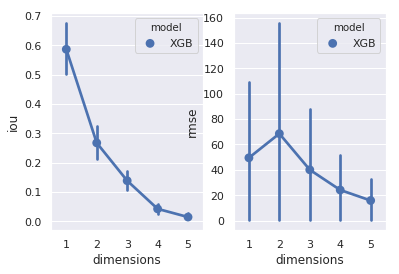

In [8]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', hue='model', data=eval_df, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='rmse', hue='model', data=eval_df, ax=ax)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


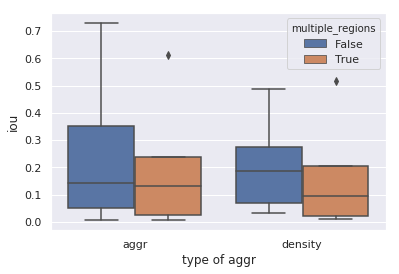

In [11]:
sns.boxplot(x='type of aggr',y='iou',hue='multiple_regions', data=eval_df)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


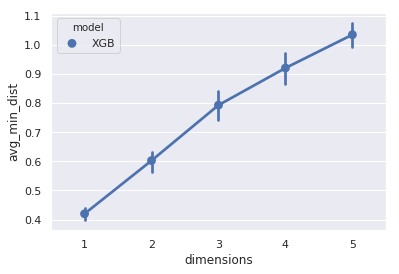

In [12]:
sns.pointplot(x='dimensions', y='avg_min_dist', hue='model', data=eval_df)

In [ ]:
#Multi-modal boxes regions are : [0,0.2]^d, [0.3,0.5]^d, [0.6,0.8]^d
#Single regions : [0.6,0.9]^d
#Defined by Multi

#Evaluation metrics are F-Score and IOU
#IOU = Intersection Over Union, ie the overlap of the proposed region and the actual regions divided by the total covered region
#F-Score : the defined region covers a number of points F-Score, in which true positives are the points covered by the defined region

#Alternative methods are :
#1) PRIM
#2) Naive (exhaustive) without objective function. Get region with highest and then merge surrounding until no improvement or exceed coverage
# 3) Naive (exhaustive) with objective. Random Walk

<h2>Using PRIM</h2>

In [13]:
import prim

INFO:prim.prim_box:mpld3 library not found, some functionality will be disabled


In [15]:
directory = os.fsencode('input')
prim_details = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".csv") and filename.startswith("data"):
        a =filename.split('_')
        t = a[1]
        dim = int(a[2].split('=')[1])
        multi = a[-1]=="True"
        #Check if query file has been generated and skip
        logger.debug('Loading file {0}'.format(filename))
        d = np.loadtxt('input/%s' % (filename) ,delimiter=',')
        b_set = []
        if t=='density':
            p = prim.Prim(d, np.ones(d.shape[0]), threshold=0.4,
                          threshold_type=">")       
        else:
            p = prim.Prim(d[:,:d.shape[1]-1], d[:,-1], threshold=2,mass_min=0.01,
                          threshold_type=">")            
        if multi :
            b_set = p.find_all()
        else:
            b_set = [p.find_box()]
        logger.debug("Number of boxes found by PRIM {0}".format(len(b_set)))
        
        boxes = compute_boxes(multi,dim)
        proposed = []
        for box in b_set :
            if box.limits.sort_index().values.shape[0]!=0:#Means is empty PRIM covers whole range
                box_x = box.limits.values[:,0]
                box_l = box.limits.values[:,1]
                box_p = np.column_stack((box_x.reshape(1,-1), box_l.reshape(1,-1)-box_x.reshape(1,-1)))
                if box_p.shape[1]!=2*dim:
                    continue;
                proposed.append(box_p.flatten())
        if len(proposed)==0:
            prim_details.append([dim,multi,t,'prim', np.nan ,np.nan])
            continue;
        proposed = np.array(proposed)
        logger.debug('Proposed '+ np.array2string(proposed))
        iou = compute_iou(boxes, proposed, multi, dim)
        avg_min_dist = min_dist(boxes, proposed)
        prim_details.append([dim,multi,t,'prim', iou ,avg_min_dist])        

DEBUG:__main__:Loading file data_density_dimensions=1_multi_True
INFO:prim.prim_alg:12500 points remaining, containing 12500 cases of interest
DEBUG:prim.prim_alg:peeling started
DEBUG:prim.prim_alg:peeling completed
DEBUG:prim.prim_alg:pasting started
DEBUG:prim.prim_alg:pasting completed
INFO:prim.prim_alg:mean: 1.000000, mass: 1.000000, coverage: 1.000000, density: 1.000000 restricted_dimensions: 0
INFO:prim.prim_alg:no data remaining
DEBUG:__main__:Number of boxes found by PRIM 1
DEBUG:__main__:Loading file data_density_dimensions=1_multi_False
INFO:prim.prim_alg:7500 points remaining, containing 7500 cases of interest
DEBUG:prim.prim_alg:peeling started
DEBUG:prim.prim_alg:peeling completed
DEBUG:prim.prim_alg:pasting started
DEBUG:prim.prim_alg:pasting completed
INFO:prim.prim_alg:mean: 1.000000, mass: 1.000000, coverage: 1.000000, density: 1.000000 restricted_dimensions: 0
DEBUG:__main__:Number of boxes found by PRIM 1
DEBUG:__main__:Loading file data_aggr_dimensions=3_multi_Tru

INFO:prim.prim_alg:no data remaining
DEBUG:__main__:Number of boxes found by PRIM 4
DEBUG:__main__:Loading file data_aggr_dimensions=5_multi_False
INFO:prim.prim_alg:5000 points remaining, containing 136 cases of interest
DEBUG:prim.prim_alg:peeling started
DEBUG:prim.prim_alg:peeling completed
DEBUG:prim.prim_alg:pasting started
INFO:prim.prim_alg:pasting 0
INFO:prim.prim_alg:pasting 2
INFO:prim.prim_alg:pasting 3
INFO:prim.prim_alg:pasting 4
INFO:prim.prim_alg:pasting 0
INFO:prim.prim_alg:pasting 2
INFO:prim.prim_alg:pasting 3
INFO:prim.prim_alg:pasting 4
INFO:prim.prim_alg:pasting 0
INFO:prim.prim_alg:pasting 2
INFO:prim.prim_alg:pasting 3
INFO:prim.prim_alg:pasting 4
INFO:prim.prim_alg:pasting 0
INFO:prim.prim_alg:pasting 2
INFO:prim.prim_alg:pasting 3
INFO:prim.prim_alg:pasting 4
INFO:prim.prim_alg:pasting 0
INFO:prim.prim_alg:pasting 2
INFO:prim.prim_alg:pasting 3
INFO:prim.prim_alg:pasting 4
DEBUG:prim.prim_alg:pasting completed
INFO:prim.prim_alg:mean: 0.034185, mass: 0.579200,

DEBUG:prim.prim_alg:peeling started
DEBUG:prim.prim_alg:peeling completed
DEBUG:prim.prim_alg:pasting started
DEBUG:prim.prim_alg:pasting completed
INFO:prim.prim_alg:mean: 0.000000, mass: 0.035000, coverage: 0.000000, density: 0.000000 restricted_dimensions: 0
INFO:prim.prim_alg:no data remaining
DEBUG:__main__:Number of boxes found by PRIM 4
DEBUG:__main__:Proposed [[6.63815998e-05 6.62586731e-05 7.96005216e-01 7.81996640e-01]
 [1.13957580e-01 2.21615849e-02 8.02019560e-01 9.74077777e-01]]
DEBUG:__main__:length of IOUs 6
INFO:__main__:Maximum IOU for box 1 is : 0.064214
INFO:__main__:Maximum IOU for box 2 is : 0.064260
INFO:__main__:Maximum IOU for box 3 is : 0.056954
DEBUG:__main__:Loading file data_density_dimensions=3_multi_False
INFO:prim.prim_alg:7500 points remaining, containing 7500 cases of interest
DEBUG:prim.prim_alg:peeling started
DEBUG:prim.prim_alg:peeling completed
DEBUG:prim.prim_alg:pasting started
DEBUG:prim.prim_alg:pasting completed
INFO:prim.prim_alg:mean: 1.0000

In [16]:
eval_df_prim = pd.DataFrame(prim_details, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


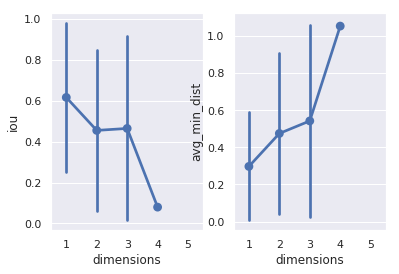

In [17]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', data=eval_df_prim, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='avg_min_dist', data=eval_df_prim, ax=ax)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


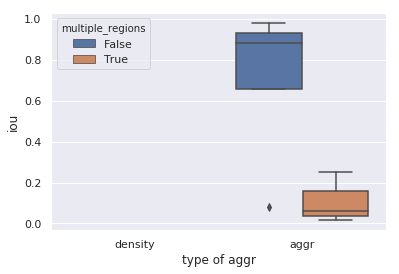

In [18]:
sns.boxplot(x='type of aggr',y='iou', hue='multiple_regions',data=eval_df_prim)

In [19]:
eval_df_prim

,dimensions,multiple_regions,type of aggr,model,iou,avg_min_dist
0,1,True,density,prim,NaN,NaN
1,1,False,density,prim,NaN,NaN
2,3,True,aggr,prim,0.014789,1.060053
3,1,False,aggr,prim,0.980707,0.006363
4,2,False,aggr,prim,0.847470,0.038996
5,4,True,aggr,prim,NaN,NaN
6,2,True,density,prim,NaN,NaN
7,5,True,aggr,prim,NaN,NaN
8,5,False,aggr,prim,NaN,NaN
9,3,True,density,prim,NaN,NaN


<h3>Naive + Glow</h3>

In [20]:
from codebase.query_generation import generate_boolean_vector,execute_query_aggr,execute_query_dens

In [21]:
ac.YREQ

2

In [22]:
def objective_density_naive(X):
    mid = X.shape[1]//2
    assert X[:,:mid].shape == (1,mid)
    b = generate_boolean_vector(d, X[:,:mid].flatten(),X[:,mid:].flatten(), dims)
    y = execute_query_dens(b, d)
    res = np.log(y - 1000) - 4*np.sum(np.log(1+X[:,mid:]),axis=1)
    res[np.isnan(res)] = -np.inf
    return res
def objective_aggr_naive(X):
    mid = X.shape[1]//2
    assert X[:,:mid].shape == (1,mid)
    b = generate_boolean_vector(d, X[:,:mid].flatten(),X[:,mid:].flatten(), dims)
    y = execute_query_aggr(b, d)
    res = np.log(y - 2) - 4*np.sum(np.log(1+X[:,mid:]),axis=1)
    res[np.isnan(res)] = -np.inf
    return res

In [23]:
directory = os.fsencode('input')
naive_glow = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".csv") and filename.startswith("data"):
        a =filename.split('_')
        t = a[1]
        dims = int(a[2].split('=')[1])
        multi = a[-1]=="True"
        aggr= a[1]
        #Check if query file has been generated and skip
        logger.debug('Loading file {0}'.format(filename))
        d = np.loadtxt('input/%s' % (filename) ,delimiter=',')
        
        d = d.reshape(-1,dims if aggr!='aggr' else dims+1)
        logger.info(d.shape)
        logger.info('Starting Optimization') 
        #Adapt number of glowworms and radius for dimensionality
        g = int(50*(dims))
        rad = (1-0.5**(1/g))**(1/dims)
        if multi:
            SUGGESTIONS=g #100
        else:
            SUGGESTIONS=g #20
        if aggr!='aggr':
            gw = GlowWorm(objective_density_naive, dimensions=2*dims,glowworms=g,iter_max=250,r0=rad)
            gw.optimize()
            ix_sort = np.argsort(np.array(list(map(lambda x: -objective_density_naive(x.reshape(1,-1)),gw.X))).reshape(g,))
            proposed = gw.X[ix_sort,:][:SUGGESTIONS]
            assert proposed.shape == (min(SUGGESTIONS,50*(dims)),2*dims)
        else:
            gw = GlowWorm(objective_aggr_naive, dimensions=2*dims,glowworms=g,iter_max=250,r0=rad)
            gw.optimize()        
            ix_sort = np.argsort(np.array(list(map(lambda x: -objective_aggr_naive(x.reshape(1,-1)),gw.X))).reshape(g,))
            proposed = gw.X[ix_sort,:][:SUGGESTIONS]
            assert proposed.shape == (min(SUGGESTIONS,50*(dims)),2*dims)
        logger.debug('Proposed '+ np.array2string(proposed))
        #Construct boxes or box and check IOU
        #Multi-modal boxes regions are : [0,0.2]^d, [0.3,0.5]^d, [0.6,0.8]^d
        #Single regions : [0.6,0.9]^d
        boxes = compute_boxes(multi,dims)
        iou_metric = compute_iou(boxes, proposed, multi,dims)
        avg_min_dist = min_dist(boxes, proposed)
        logger.info('Average Minimum Distance {:.2f}'.format(avg_min_dist))
        logger.info('Finished Run =======================================')
    naive_glow.append([dims,multi,aggr,'naive_glow', iou_metric ,avg_min_dist])

DEBUG:__main__:Loading file data_density_dimensions=1_multi_True
INFO:__main__:(12500, 1)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.40582964 0.38603743]
 [0.32912166 0.49348581]
 [0.26793961 0.51775264]
 [0.111372   0.36366918]
 [0.09563815 0.44627517]
 [0.00203304 0.5818865 ]
 [0.05484252 0.30367374]
 [0.16832389 0.62172149]
 [0.14424158 0.30632485]
 [0.5738617  0.19689926]
 [0.03691442 0.2356134 ]
 [0.28180321 0.67079326]
 [0.51343212 0.25416967]
 [0.33875258 0.70177823]
 [0.40989217 0.23485568]
 [0.55057673 0.47957182]
 [0.66775228 0.24522489]
 [0.63591146 0.39701684]
 [0.05023918 0.97105553]
 [0.20470273 0.84252432]
 [0.2218651  0.84707302]
 [0.36277959 0.77334942]
 [0.20245594 0.87368029]
 [0.41388583 0.79553844]
 [0.44688293 0.81878338]
 [0.57000575 0.7123953 ]
 [0.55962061 0.72781067]
 [0.41515775 0.93165187]
 [0.49965465 0.78778161]
 [0.36742326 0.0883275 ]
 [0.72369515 0.11199827]
 [0.47919287 0.98830421]
 [0.76172441 0.37738   ]
 [0.44470923 0.10808818]


DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.069178
INFO:__main__:Maximum IOU for box 2 is : 0.084114
INFO:__main__:Maximum IOU for box 3 is : 0.063595
INFO:__main__:Average Minimum Distance 0.83
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_aggr_dimensions=1_multi_False
INFO:__main__:(5000, 2)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.66879256 0.03216754]
 [0.77616246 0.11150339]
 [0.60406189 0.1832509 ]
 [0.61468257 0.21794838]
 [0.71910045 0.21329525]
 [0.60308023 0.33175302]
 [0.5360069  0.29965604]
 [0.50609286 0.41766539]
 [0.5875651  0.52617763]
 [0.56291537 0.55698204]
 [0.65372098 0.71850784]
 [0.68746355 0.75085409]
 [0.60962852 0.88995352]
 [0.43993343 0.58934118]
 [0.5825555  0.97283232]
 [0.78393373 0.58264407]
 [0.72628045 0.970636  ]
 [0.81090349 0.49401521]
 [0.43339486 0.93057915]
 [0.39222299 0.86312066]]
DEBUG:__main__:length of IOUs 20
INFO:__main__:Maximum IO

DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.000000
INFO:__main__:Maximum IOU for box 2 is : 0.007712
INFO:__main__:Maximum IOU for box 3 is : 0.032102
INFO:__main__:Average Minimum Distance 0.97
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_density_dimensions=2_multi_True
INFO:__main__:(12500, 2)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[2.04868543e-01 1.67455494e-01 5.39097708e-01 3.14122616e-01]
 [6.61568233e-01 5.72175821e-01 2.63650873e-01 4.43800304e-01]
 [2.64482916e-01 2.64436249e-01 6.81815774e-01 2.74215001e-01]
 [5.25317142e-01 6.43132303e-01 2.54402958e-01 4.47170243e-01]
 [2.26750139e-01 4.27041086e-01 7.35367219e-01 4.10893711e-01]
 [3.23329067e-01 6.63570286e-01 5.14943981e-01 2.13201118e-01]
 [1.21974082e-01 3.44017397e-01 7.98013253e-01 5.01250564e-01]
 [3.32111496e-01 4.33068247e-01 4.04859661e-01 5.87706865e-01]
 [2.50179029e-01 3.22945666e-01 8.68544789e-01 4.25

DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.000000
INFO:__main__:Maximum IOU for box 2 is : 0.027097
INFO:__main__:Maximum IOU for box 3 is : 0.002913
INFO:__main__:Average Minimum Distance 1.08
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_aggr_dimensions=5_multi_False
INFO:__main__:(5000, 6)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.97917198 0.94262079 0.23322357 0.56385074 0.27277642 0.22924484
  0.41734228 0.84861659 0.20020219 0.4071633 ]
 [0.62586425 0.88224822 0.05366885 0.34517743 0.82059992 0.08811544
  0.05863999 0.9209985  0.8581133  0.69906226]
 [0.99018562 0.98649298 0.09340659 0.64441901 0.76047233 0.50104141
  0.42504754 0.04623303 0.30669462 0.37306904]
 [0.93882916 0.60219558 0.68029206 0.3247486  0.09545595 0.73697941
  0.87456093 0.31403531 0.59990988 0.94283149]
 [0.66896496 0.14762825 0.50409725 0.60747109 0.34141708 0.22372667
  0.88553332 0.16103518 0.4516

DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.000000
INFO:__main__:Maximum IOU for box 2 is : 0.077275
INFO:__main__:Maximum IOU for box 3 is : 0.098866
INFO:__main__:Average Minimum Distance 0.83
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_density_dimensions=5_multi_False
INFO:__main__:(7500, 5)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.32699883 0.64266446 0.20887722 0.60877443 0.52831264 0.72587415
  0.24030501 0.94291464 0.25781928 0.3752216 ]
 [0.28903765 0.2338234  0.44035042 0.30284019 0.60847554 0.88048532
  0.59015233 0.47013047 0.52430527 0.25623165]
 [0.25522694 0.33176159 0.36582195 0.49999708 0.31103323 0.92761593
  0.56563531 0.93049919 0.69347622 0.7324094 ]
 [0.31672745 0.43019688 0.30140718 0.51467826 0.48137203 0.81558468
  0.95114862 0.74434238 0.85292175 0.74514567]
 [0.66704405 0.51695742 0.4956437  0.36124631 0.27326505 0.86462604
  0.79608926 0.89494257 0.8

INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[1.98879227e-01 5.71072514e-01 6.27323144e-01 4.49283020e-01
  9.02554269e-01 3.14450051e-01 3.16303181e-01 8.24666400e-01]
 [3.14366914e-01 2.70631795e-01 2.40825208e-01 2.44781605e-01
  1.23124455e-01 4.51948576e-01 9.13999054e-01 7.83621918e-01]
 [6.03838344e-01 2.08986752e-01 2.61961728e-01 6.13678180e-01
  2.02799269e-01 7.42202834e-01 8.36916802e-01 7.92819146e-01]
 [1.76250663e-01 2.39700295e-01 1.14386743e-01 3.90715177e-01
  9.11380865e-01 8.59137020e-01 6.71755627e-01 4.70201991e-01]
 [7.53825369e-03 8.62937748e-02 1.64235308e-01 1.44463437e-02
  8.24399210e-01 3.89162248e-01 7.80663478e-01 8.90144244e-01]
 [4.82307713e-02 5.12960110e-01 2.21335882e-01 3.63304495e-01
  8.57199195e-01 4.33723865e-01 6.40351971e-01 3.21207529e-01]
 [4.69855122e-01 2.28101091e-01 1.37697741e-01 1.42566303e-01
  5.29242257e-01 9.91585180e-01 7.02649170e-01 7.63695658e-01]
 [2.52848410e-02 4.98440618e-01 6.89387513e-01 3.12614959e-01
  8

DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.000647
INFO:__main__:Maximum IOU for box 2 is : 0.029366
INFO:__main__:Maximum IOU for box 3 is : 0.027167
INFO:__main__:Average Minimum Distance 0.96
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_aggr_dimensions=2_multi_True
INFO:__main__:(5000, 3)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.35602772 0.38277029 0.15691839 0.12588838]
 [0.0526357  0.3136465  0.32787211 0.73139816]
 [0.58737445 0.19576893 0.88752702 0.14299735]
 [0.34827672 0.27239101 0.5851413  0.95667396]
 [0.9347325  0.78996157 0.68318621 0.04445248]
 [0.81397163 0.41092081 0.92334645 0.15691066]
 [0.24826431 0.65967602 0.79807287 0.23974362]
 [0.20471479 0.26656312 0.97729501 0.42145284]
 [0.4780136  0.43737888 0.40749797 0.10486378]
 [0.49331633 0.14650117 0.08312371 0.76785448]
 [0.55591869 0.9250315  0.998357   0.94770357]
 [0.03671598 0.21543178 0.24156429 0.42169

DEBUG:__main__:length of IOUs 300
INFO:__main__:Maximum IOU for box 1 is : 0.000000
INFO:__main__:Maximum IOU for box 2 is : 0.011589
INFO:__main__:Maximum IOU for box 3 is : 0.009975
INFO:__main__:Average Minimum Distance 1.11
INFO:__main__:Finished Run =======================================
DEBUG:__main__:Loading file data_density_dimensions=4_multi_False
INFO:__main__:(7500, 4)
INFO:__main__:Starting Optimization
DEBUG:__main__:Proposed [[0.57991296 0.61960797 0.47061469 0.54013215 0.55734783 0.24658138
  0.33141957 0.60099452]
 [0.56436875 0.33341693 0.52943246 0.44590046 0.46574807 0.59408642
  0.51265659 0.28086688]
 [0.46095371 0.07968348 0.55242148 0.31106213 0.55017018 0.88316419
  0.6037718  0.48778219]
 [0.5141264  0.53969559 0.51775939 0.52246697 0.5462433  0.26612743
  0.98531328 0.83401871]
 [0.53294331 0.00721053 0.45652774 0.29033375 0.32080617 0.95282231
  0.30820676 0.89662891]
 [0.22935185 0.54956715 0.64342316 0.38498537 0.75612793 0.84558922
  0.75534842 0.5427432

In [24]:
eval_df_naive_glow = pd.DataFrame(naive_glow, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


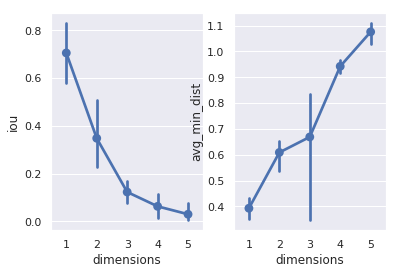

In [25]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', data=eval_df_naive_glow, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='avg_min_dist', data=eval_df_naive_glow, ax=ax)

<h3>Naive Method</h3>

In [26]:
def naive_objective_density(X):
    res = np.log(X[:,-1] - 1000) - 4*np.sum(np.log(1+X[:,X.shape[1]//2:X.shape[1]-1]))
    res[np.isnan(res)] = -np.inf
    return res
def naive_objective_aggr(X):
    res = np.log(X[:,-1] - 2) - 4*np.sum(np.log(1+X[:,X.shape[1]//2:X.shape[1]-1]))
    res[np.isnan(res)] = -np.inf
    return res

In [27]:
naive_details = []
directory = os.fsencode('input/queries')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith('queries'):
        a = filename.split('-')
        dims = int(int(a[2]))
        multi = a[3].split('_')[1]=="True"
        aggr = a[4]
        m = None
        f = np.loadtxt('input/queries/%s' % (filename) ,delimiter=',')
        logger.debug(filename)
        if multi:
            SUGGESTIONS=f.shape[0]#100
        else:
            SUGGESTIONS=f.shape[0]#20
        if aggr=='aggr':
            proposed = f[np.argsort(naive_objective_aggr(f))[::-1][:SUGGESTIONS],:f.shape[1]-1]
        else:
            proposed = f[np.argsort(naive_objective_density(f))[::-1][:SUGGESTIONS],:f.shape[1]-1]
        assert proposed.shape[1]==2*dims and proposed.shape[0]==10
            
        logger.debug('Proposed '+ np.array2string(proposed))
        #Construct boxes or box and check IOU
        #Multi-modal boxes regions are : [0,0.2]^d, [0.3,0.5]^d, [0.6,0.8]^d
        #Single regions : [0.6,0.9]^d
        boxes = compute_boxes(multi,dims)
        iou_metric = compute_iou(boxes, proposed, multi, dims)
        avg_min_dist = min_dist(boxes, proposed)
        logger.info('Average Minimum Distance {:.2f}'.format(avg_min_dist))
        logger.info('Finished Run =======================================')
        naive_details.append([dims,multi,aggr,'naive_obj', iou_metric ,avg_min_dist])

DEBUG:__main__:queries-uniform-5-multi_True-density
DEBUG:__main__:Proposed [[ 0.14635957  0.22110478  0.24259034  0.27470112  0.19990558  0.68107532
   0.68107532  0.68107532  0.68107532  0.68107532]
 [ 0.14225574  0.25659157  0.29976499  0.25589146  0.20471911  0.65962711
   0.65962711  0.65962711  0.65962711  0.65962711]
 [ 0.1321929   0.15265547  0.29099151  0.31698348  0.15939118  0.68157021
   0.68157021  0.68157021  0.68157021  0.68157021]
 [-0.08034538 -0.10445049 -0.14900062 -0.12584046 -0.12646103  0.66600669
   0.66600669  0.66600669  0.66600669  0.66600669]
 [ 0.2985861   0.101992    0.1853636   0.12378225  0.29591551  0.66634589
   0.66634589  0.66634589  0.66634589  0.66634589]
 [ 0.26634186  0.21490286  0.32627021  0.2137244   0.21558102  0.62026601
   0.62026601  0.62026601  0.62026601  0.62026601]
 [ 0.09013018  0.13989449  0.27705663  0.27847162  0.17377982  0.65746472
   0.65746472  0.65746472  0.65746472  0.65746472]
 [ 0.18601002  0.18582052  0.13456278  0.33706248

DEBUG:__main__:length of IOUs 30
INFO:__main__:Maximum IOU for box 1 is : 0.014978
INFO:__main__:Maximum IOU for box 2 is : 0.017451
INFO:__main__:Maximum IOU for box 3 is : 0.020558
INFO:__main__:Average Minimum Distance 0.77
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-2-multi_False-density
DEBUG:__main__:Proposed [[0.53726387 0.50913501 0.38235025 0.38235025]
 [0.59433418 0.53684991 0.35966487 0.35966487]
 [0.51977686 0.5805775  0.36662366 0.36662366]
 [0.58869621 0.59989546 0.30106554 0.30106554]
 [0.56920251 0.59109383 0.3145559  0.3145559 ]
 [0.53256627 0.63852955 0.35079516 0.35079516]
 [0.50009683 0.50874029 0.35911806 0.35911806]
 [0.60647846 0.47868328 0.35408644 0.35408644]
 [0.49692451 0.58852325 0.33656007 0.33656007]
 [0.62006562 0.65789805 0.33285266 0.33285266]]
DEBUG:__main__:length of IOUs 10
INFO:__main__:Maximum IOU of proposed boxes 0.927614
INFO:__main__:Average Minimum Distance 0.10
INFO:__main__:Finished Run =

DEBUG:__main__:length of IOUs 30
INFO:__main__:Maximum IOU for box 1 is : 0.010813
INFO:__main__:Maximum IOU for box 2 is : 0.383532
INFO:__main__:Maximum IOU for box 3 is : 0.397078
INFO:__main__:Average Minimum Distance 0.27
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-1-multi_False-aggr
DEBUG:__main__:Proposed [[0.70631112 0.03899378]
 [0.81223465 0.05543381]
 [0.81538211 0.04601409]
 [0.65936403 0.09541617]
 [0.79893399 0.08231406]
 [0.71746151 0.05677274]
 [0.69620344 0.09827685]
 [0.65659085 0.10845128]
 [0.72183018 0.07200903]
 [0.64999717 0.06187349]]
DEBUG:__main__:length of IOUs 10
INFO:__main__:Maximum IOU of proposed boxes 0.361504
INFO:__main__:Average Minimum Distance 0.26
INFO:__main__:Finished Run =======================================
DEBUG:__main__:queries-uniform-5-multi_True-aggr
DEBUG:__main__:Proposed [[ 0.27300124  0.90154413  0.69365484 -0.43923839  0.12808513  0.54089198
   0.54089198  0.54089198  0.54089198

In [28]:
eval_df_naive = pd.DataFrame(naive_details, columns=['dimensions','multiple_regions','type of aggr', 'model', 'iou', 'avg_min_dist'])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


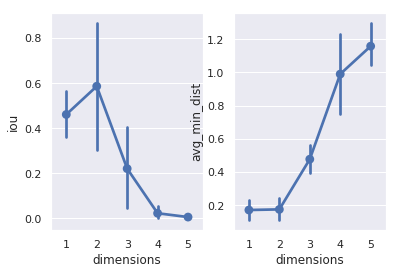

In [29]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.pointplot(x='dimensions', y='iou', data=eval_df_naive, ax=ax)
ax = fig.add_subplot(122)
sns.pointplot(x='dimensions', y='avg_min_dist', data=eval_df_naive, ax=ax)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


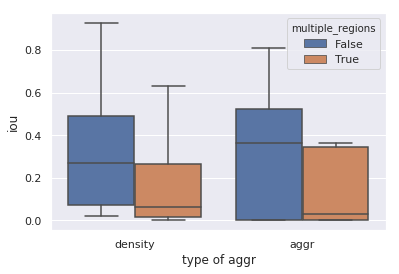

In [30]:
sns.boxplot(x='type of aggr',y='iou', hue='multiple_regions',data=eval_df_naive)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


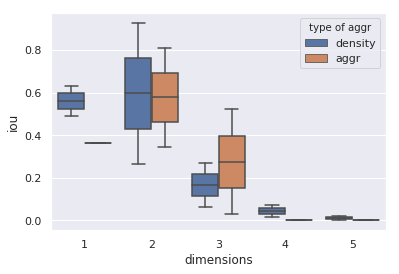

In [31]:
sns.boxplot(x='dimensions',y='iou',hue='type of aggr', data=eval_df_naive)

<h3>Comparison All</h3>

In [32]:
total_df = pd.concat([eval_df,eval_df_naive,eval_df_prim, eval_df_naive_glow],ignore_index=True,)

In [33]:
total_df = total_df.replace(np.nan, 0)

In [ ]:
# import datetime
# now = datetime.datetime.now()
# total_df.to_csv('output/synthetic_accuracy{0}.csv'.format(str(now)))

In [2]:
# total_df = pd.read_csv('output/synthetic_accuracy2019-05-09 15:36:22.898531.csv',index_col=0)

In [34]:
total_df['model']=total_df['model'].replace({'XGB':'SuRF','naive_glow': '$f$+GlowWorm', 'naive_obj':'Naive', 'prim': 'PRIM'})

In [35]:
total_df['multiple'] = total_df['multiple_regions']
total_df = total_df.drop(columns=['multiple_regions'])
total_df['type of aggr']=total_df['type of aggr'].replace({'aggr':'Aggregate','density': 'Density'})
total_df['multiple']=total_df['multiple'].replace({True:'k=3',False: 'k=1'})

In [36]:
total_df.pivot_table(values='iou',index=['model','type of aggr','multiple'], columns=['dimensions'], aggfunc=lambda x:x)

dimensions                                 1          2          3  \
model        type of aggr multiple                                   
$f$+GlowWorm Aggregate    k=1       0.886769   0.592264         []   
                          k=3       0.555871   0.263898  0.0722956   
             Density      k=1       0.776203   0.347064    0.21193   
                          k=3       0.601315   0.188804  0.0587136   
Naive        Aggregate    k=1       0.361504   0.808412   0.520755   
                          k=3       0.362537   0.345246  0.0281999   
             Density      k=1       0.487721   0.927614   0.271749   
                          k=3       0.632892   0.263808  0.0634573   
PRIM         Aggregate    k=1       0.980707    0.84747   0.913702   
                          k=3       0.250864  0.0618094  0.0147887   
             Density      k=1              0          0          0   
                          k=3              0          0          0   
SuRF         Aggregate    k=1       0.730302    0.35271   0.142235   
                          k=3       0.611214    0.23917   0.130366   
             Density      k=1       0.487345   0.273085   0.185489   
                          k=3       0.517868   0.204928  0.0959071   

dimensions                                    4           5  
model        type of aggr multiple                           
$f$+GlowWorm Aggregate    k=1         0.0748642   0.0021196  
                          k=3         0.0132715   0.0100036  
             Density      k=1          0.144678    0.100358  
                          k=3         0.0190599  0.00718816  
Naive        Aggregate    k=1                 0  0.00111992  
                          k=3       0.000555265           0  
             Density      k=1         0.0740912   0.0204322  
                          k=3         0.0176623  0.00298459  
PRIM         Aggregate    k=1         0.0796889           0  
                          k=3                 0           0  
             Density      k=1                 0           0  
                          k=3                 0           0  
SuRF         Aggregate    k=1         0.0518714   0.0087978  
                          k=3         0.0262752  0.00563758  
             Density      k=1         0.0691393     0.03312  
                          k=3         0.0226951   0.0105497

In [37]:
total_df.groupby(['dimensions','model'])['iou'].mean()

dimensions  model       
1           $f$+GlowWorm    0.705039
            Naive           0.461163
            PRIM            0.307893
            SuRF            0.586682
2           $f$+GlowWorm    0.348007
            Naive           0.586270
            PRIM            0.227320
            SuRF            0.267473
3           $f$+GlowWorm    0.122999
            Naive           0.221040
            PRIM            0.232123
            SuRF            0.138499
4           $f$+GlowWorm    0.062968
            Naive           0.023077
            PRIM            0.019922
            SuRF            0.042495
5           $f$+GlowWorm    0.029917
            Naive           0.006134
            PRIM            0.000000
            SuRF            0.014526
Name: iou, dtype: float64

In [38]:
plt.style.use('seaborn-ticks')
plt.rc('text', usetex=True)
font_size=22
params = {'backend': 'ps',
          'text.latex.preamble': ['\\usepackage{gensymb}'],
          'text.usetex': True,
          'font.family': 'serif'
}

plt.rcParams.update(params)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Serif ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf') with score of 0.050000.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatib

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/ada10624a87904d7fc66a54edc980419.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Serif ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf') with score of 0.050000.
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/ce37e3bc3c278de36ceb72ea035685b1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.dviread:find_tex_file result: b'/usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr12.tfm'
DEBUG:matplotlib.dviread:opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr12.tfm
DEBUG:matplotlib.dviread:lh=18, bc=0, ec=127, nw=34, nh=16, nd=10
DEBUG:matplotlib.dviread:find_tex_file(cmr12.vf): ['kpsewhich', 'cmr12.vf']
DEBUG:matplotlib.dviread:find_tex_file result: b''
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/388c6ec693c26383f1e32e19cd24cfaa.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/ada10624a87904d7fc66a54edc980419.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplot

DEBUG:matplotlib.dviread:opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr17.tfm
DEBUG:matplotlib.dviread:lh=18, bc=0, ec=127, nw=36, nh=16, nd=9
DEBUG:matplotlib.dviread:find_tex_file(cmr17.vf): ['kpsewhich', 'cmr17.vf']
DEBUG:matplotlib.dviread:find_tex_file result: b''
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/56ce8e07d3d6fece11b5525b9503bdef.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.dviread:find_tex_file(cmmi12.tfm): ['kpsewhich', 'cmmi12.tfm']
DEBUG:matplotlib.dviread:find_tex_file result: b'/usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmmi12.tfm'
DEBUG:matplotlib.dviread:opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmmi12.tfm
DEBUG:matplotlib.dviread:lh=18, bc=0, ec=127, nw=97, nh=15, nd=9
DEBUG:matplotlib.dviread:find_tex_file(cmmi12.vf): ['kps

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/eb694ff9b716ace8d6ca7b37ca7e1e20.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/eb694ff9b716ace8d6ca7b37ca7e1e20.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8fc6d3fcf1c4c899c862f8a4f8c17961.dvi
DEBUG:matplotlib.dvi

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/047c85c6330895fcd9ed0533e0b2ae0d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/13dfa2deb03f1caa903632fd3b172939.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/56ce8e07d3d6fece11b5525b9503bdef.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/15c2d33f1ff5492eb13bd62704839d77.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font 

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/81bd9bbb932f88fc4382d7ec2fb15f2d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/81df03f758abccc3f3f6535f130e5d91.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8069aac72578843ea6e945188478ee38.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8be2a8820fb79ca4ba9120f8cc4c9fd3.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/915b621e15e16bb08332cf95c10b5bda.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/08c01847e9586056d664dad849f44383.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8ad0f1a228abecdabc9c63605fb13300.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8069aac72578843ea6e945188478ee38.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.font_manager:findfont: Matching :family=serif:style=normal:variant=normal:weight=normal:stretch=normal:size=22.0 to DejaVu Serif ('/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf') with score of 0.050000.
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/eb694ff9b716ace8d6ca7b37ca7e1e20.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: se

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/bdf7eac86a857e0b53b442750712671f.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/ce6fbca9ad6487d35381d6a3817d69dd.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcm

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8ad0f1a228abecdabc9c63605fb13300.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/13dfa2deb03f1caa903632fd3b172939.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/1aa199f78e38bade1510fea08033d7a2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8ad0f1a228abecdabc9c63605fb13300.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/13dfa2deb03f1caa903632fd3b172939.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/56ce8e07d3d6fece11b5525b9503bdef.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.texmanager:text.latex.preview  : None       -> False     
DEBUG:matplotlib.texmanager:font.family         : None       -> ['serif'] 
DEBUG:matplotlib.texmanager:font.serif          : None       -> ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
DEBUG:matplotlib.texmanager:font.sans-serif     : None       -> ['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
DEBUG:matplotlib.texmanager:font.cursive        : None       -> ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
DEBUG:matplotlib.texmanager:font.monospace      : None       -> ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
DEBUG:matplotlib.te

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/be8195efb43cd14370f2eb4799aa630a.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6f4da468c7a6def2c08d46f75342edb5.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/4bc9c678d0653e56c2b4221d5516366c.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontcon

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/81df03f758abccc3f3f6535f130e5d91.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8069aac72578843ea6e945188478ee38.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcm

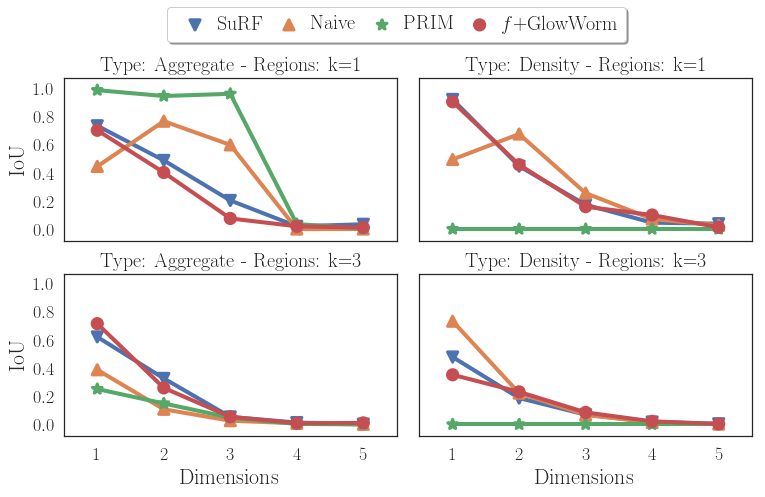

In [7]:
g= sns.catplot(x="dimensions", y="iou", hue="model",ci=False,markers=['v', '^','*','o', '.'] ,scale=1.5 ,col="type of aggr",  row="multiple"
            ,despine=False,kind='point', data=total_df, legend=False,legend_out=False,height=3, aspect=1.75)
lgd = g.fig.get_axes()[0].legend(loc='upper center', bbox_to_anchor=(1, 1.5),prop={'size':20},
                                ncol=4, columnspacing=0.3, handletextpad=0.1,frameon=True,fancybox=True, shadow=True)
g.set_titles(template="Type: {col_name} - Regions: {row_name}", size=20)
g.set_xlabels(label="Dimensions", fontsize=font_size)
g.set_ylabels(label=r'IoU', fontsize=font_size)
g.set_xticklabels(labels=range(1,6),size=18)
g.set_yticklabels(size=18)
g.despine(top=False, right=False)
# plt.savefig('output/accuracy/synthetic-four.eps',format='eps',dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [40]:
total_df['multiple_regions'].replace({True: "k=3"})

KeyError: 'multiple_regions'

DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:monospace font is not compatible 

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/6aa22efebbcc439fc2afa276ad3ca223.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/b89efb5e7d0e3541a3884f8e71473423.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcm

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/31b8fb0116f3d2a0c48d8b5803c44249.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8292f763250662be410ef763001bd0a4.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:m

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/9f7c8ed9c7f098ed3c96ca9a62168ef1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/eb694ff9b716ace8d6ca7b37ca7e1e20.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/m

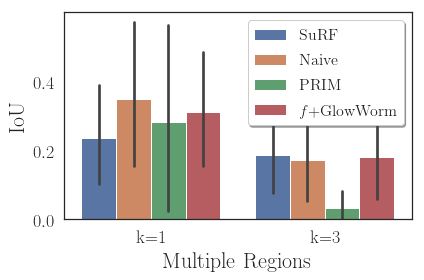

In [41]:
ax = sns.barplot(x='multiple',y='iou',hue='model', data=total_df)
ax.set_xlabel('Multiple Regions', fontsize=font_size)
ax.set_ylabel(r'IoU', fontsize=font_size)
ax.tick_params(labelsize=18)
plt.legend(prop={'size':16},shadow=True, frameon=True)
plt.tight_layout()
# plt.savefig('output/accuracy/synthetic_accuracy_multiple_regions.eps',format='eps', dpi=300)

DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: serif, font: Computer Modern Roman, info: ('cmr', '')
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:sans-serif font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: sans-serif, font: sans-serif, info: ('cmss', '')
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:cursive font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:monospace font is not compatible 

DEBUG:matplotlib.texmanager:monospace font is not compatible with usetex.
DEBUG:matplotlib.texmanager:family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
DEBUG:matplotlib.texmanager:following keys changed: ['text.latex.preamble', 'text.latex.unicode', 'text.latex.preview', 'font.family', 'font.serif', 'font.sans-serif', 'font.cursive', 'font.monospace']
DEBUG:matplotlib.texmanager:text.latex.preamble : None       -> ['\\usepackage{gensymb}']
DEBUG:matplotlib.texmanager:text.latex.unicode  : None       -> True      
DEBUG:matplotlib.texmanager:text.latex.preview  : None       -> False     
DEBUG:matplotlib.texmanager:font.family         : None       -> ['serif'] 
DEBUG:matplotlib.texmanager:font.serif          : None       -> ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
DEBUG:matpl

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/9f7c8ed9c7f098ed3c96ca9a62168ef1.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/81bd9bbb932f88fc4382d7ec2fb15f2d.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/731fea91495e45dd1eb5c0a88c127a62.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

/home/fotis/anaconda3/envs/data_vis/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/522bb5b693b91df30293792556b40d30.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home

DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/31b8fb0116f3d2a0c48d8b5803c44249.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8a5c34cb08cc73292460ed5ebe1b30c2.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8292f763250662be410ef763001bd0a4.dvi
DEBUG:matplotlib.dvi

DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/eb694ff9b716ace8d6ca7b37ca7e1e20.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/522bb5b693b91df30293792556b40d30.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/m

DEBUG:matplotlib.texmanager:font.family         : None       -> ['serif'] 
DEBUG:matplotlib.texmanager:font.serif          : None       -> ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
DEBUG:matplotlib.texmanager:font.sans-serif     : None       -> ['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
DEBUG:matplotlib.texmanager:font.cursive        : None       -> ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
DEBUG:matplotlib.texmanager:font.monospace      : None       -> ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
DEBUG:matplotlib.texmanager:RE-INIT
old fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50f

DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/8292f763250662be410ef763001bd0a4.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/matplotlib/tex.cache/522bb5b693b91df30293792556b40d30.dvi
DEBUG:matplotlib.dviread:Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.texmanager:fontconfig: serifcmrcmsspzccmtt20497a30a03f610e773b50fa581d240e
DEBUG:matplotlib.dviread:Dvi: /home/fotis/.cache/m

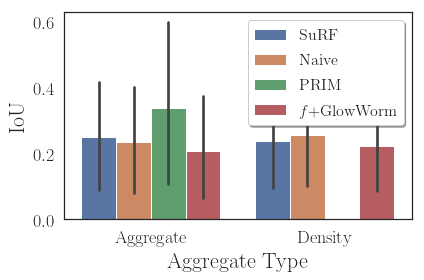

In [9]:
ax = sns.barplot(x='type of aggr',y='iou',hue='model', data=total_df)
ax.set_xlabel('Aggregate Type', fontsize=font_size)
ax.set_ylabel(r'IoU', fontsize=font_size)
ax.tick_params(labelsize=18)
plt.legend(prop={'size':16},shadow=True, frameon=True)
plt.tight_layout()
# plt.savefig('output/accuracy/synthetic_accuracy_type.eps',format='eps', dpi=300)